In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [12]:
def parser(x):
    return pd.datetime.strptime('190' + x, '%Y-%m')

In [13]:
series =pd.read_csv('C:/Users/adity/Downloads/shampoo.csv', header=0, parse_dates=[0],
index_col=0, squeeze=True, date_parser=parser)

<ipython-input-12-86637dcd8363>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190' + x, '%Y-%m')


In [14]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

In [16]:
series.tail()

Month
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

In [17]:
series.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

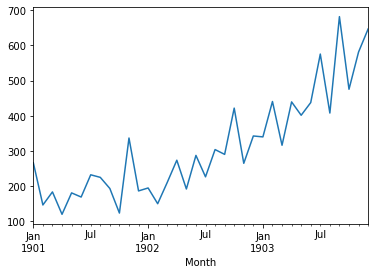

In [18]:
series.plot()

In [26]:
model = ARIMA(series, order = (5,1,0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

C:\Users\adity\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\adity\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Wed, 07 Oct 2020   AIC                            406.340
Time:                        11:45:29   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

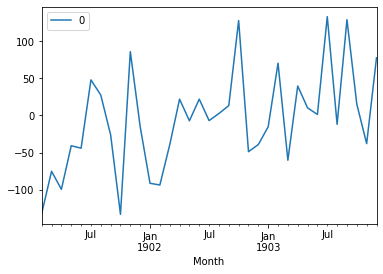

In [29]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

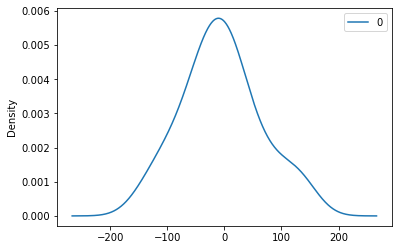

                0
count   35.000000
mean    -5.495168
std     68.132885
min   -133.296567
25%    -42.477873
50%     -7.186522
75%     24.748378
max    133.237994


In [30]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [32]:
X = series.values

In [34]:
X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [36]:
size = int(len(X) * 0.66)
size

23

In [37]:
train = X[0:size]
test = X[size:len(X)]

In [39]:
train

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5])

In [40]:
test

array([342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6,
       682. , 475.3, 581.3, 646.9])

In [42]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order = (5,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=349.117729, expected=342.300000
predicted=306.512894, expected=339.700000
predicted=387.376429, expected=440.400000
predicted=348.154147, expected=315.900000
predicted=386.308803, expected=439.300000
predicted=356.082000, expected=401.300000
predicted=446.379483, expected=437.400000
predicted=394.737268, expected=575.500000
predicted=434.915537, expected=407.600000
predicted=507.923463, expected=682.000000
predicted=435.483015, expected=475.300000
predicted=652.743752, expected=581.300000
predicted=546.343488, expected=646.900000
Test MSE: 6958.325


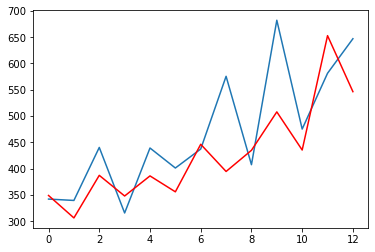

In [44]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()